# Visualisation on the sentiment result 

## 1) Import the necessary library(matplotlib)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
pd.set_option('display.max_colwidth', None)

dataall=pd.read_csv(r'spark_vader_entropy_result.csv')


## 2) drop unwanted columns and resetting certain column

In [2]:
dataall=dataall.drop(dataall.columns[0], axis=1)
dataall["positive_word(VADER)"]=''
dataall["negative_word(VADER)"]=''
dataall

,No.,Date,Media,News_title,Sentiment(MaxEntropy),positive_word(VADER),negative_word(VADER),Year,Month,Day,Vader_Score,Sentiment(VADER),Sentiment(SparkNLP),Score(SparkNLP)
0,1,2022-11-17 00:00:00,Theborneopost,MSMEs call for moratorium to restart business,2,,,2022,November,17,0.000,2,0,-0.999701
1,2,2022-11-02 00:00:00,Theedgemalaysia,Rethinking tourism with travel tech | The Edge Markets,2,,,2022,November,2,0.000,2,1,0.999946
2,3,2022-11-02 00:00:00,Newsmalaysiamsn,Why Are We Spending So Much Right Now,2,,,2022,November,2,0.000,2,0,-1.000000
3,4,2022-11-02 00:00:00,The Rakyat Post,Why Are We Spending So Much Right Now,2,,,2022,November,2,0.000,2,0,-1.000000
4,5,2022-10-24 00:00:00,The Malaysian Insight,"Issue of film industry royalty to be reviewed, says PM",2,,,2022,October,24,0.000,2,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2,2015-06-03 00:00:00,Theedgemalaysia,Trade Wise: All Eyes On 11th Malaysia Plan,2,,,2015,June,3,0.477,1,1,1.000000
1856,3,2015-01-29 00:00:00,Theedgemalaysia,Penang To See Rm5b Fdis In Manufacturing,2,,,2015,January,29,0.000,2,1,1.000000
1857,1,2015-06-02 00:00:00,Theedgemalaysia,The State Of The Nation: Government Freeze Weighs On Job Market And Consumer Sentiment,0,,,2015,June,2,0.052,1,0,-0.967074
1858,1,2015-06-09 00:00:00,Theedgemalaysia,The State Of The Nation: 'good' 1q Gdp Not Reflective Of Rest Of Year,1,,,2015,June,9,0.000,2,0,-0.913750


## 3) Change from 0,1,2 to Negative,Positive,Neutral respectively

In [3]:
#iterate every row of data
for i in dataall.index:
    
    #load the vader, spark and entropy sentiment result and store it into variable
    vader=dataall.loc[i,'Sentiment(VADER)']
    spark=dataall.loc[i,'Sentiment(SparkNLP)']
    entropy=dataall.loc[i,'Sentiment(MaxEntropy)']
    
    #Assigning Negative,Positive,Neutral for 0,1,2 respectively
    if(spark==2):
        spark="Neutral"
    elif(spark==1):
        spark="Positive"
    elif(spark==0):
        spark="Negative"
    
    if(vader==2):
        vader="Neutral"
    elif(vader==1):
        vader="Positive"
    elif(vader==0):
        vader="Negative"
    
    
    if(entropy==2):
        entropy="Neutral"
    elif(entropy==1):
        entropy="Positive"
    elif(entropy==0):
        entropy="Negative"
     
    #assign the result into the column
    dataall.loc[i,'Sentiment(VADER)']=vader
    dataall.loc[i,'Sentiment(SparkNLP)']=spark
    dataall.loc[i,'Sentiment(MaxEntropy)']=entropy
dataall

,No.,Date,Media,News_title,Sentiment(MaxEntropy),positive_word(VADER),negative_word(VADER),Year,Month,Day,Vader_Score,Sentiment(VADER),Sentiment(SparkNLP),Score(SparkNLP)
0,1,2022-11-17 00:00:00,Theborneopost,MSMEs call for moratorium to restart business,Neutral,,,2022,November,17,0.000,Neutral,Negative,-0.999701
1,2,2022-11-02 00:00:00,Theedgemalaysia,Rethinking tourism with travel tech | The Edge Markets,Neutral,,,2022,November,2,0.000,Neutral,Positive,0.999946
2,3,2022-11-02 00:00:00,Newsmalaysiamsn,Why Are We Spending So Much Right Now,Neutral,,,2022,November,2,0.000,Neutral,Negative,-1.000000
3,4,2022-11-02 00:00:00,The Rakyat Post,Why Are We Spending So Much Right Now,Neutral,,,2022,November,2,0.000,Neutral,Negative,-1.000000
4,5,2022-10-24 00:00:00,The Malaysian Insight,"Issue of film industry royalty to be reviewed, says PM",Neutral,,,2022,October,24,0.000,Neutral,Positive,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2,2015-06-03 00:00:00,Theedgemalaysia,Trade Wise: All Eyes On 11th Malaysia Plan,Neutral,,,2015,June,3,0.477,Positive,Positive,1.000000
1856,3,2015-01-29 00:00:00,Theedgemalaysia,Penang To See Rm5b Fdis In Manufacturing,Neutral,,,2015,January,29,0.000,Neutral,Positive,1.000000
1857,1,2015-06-02 00:00:00,Theedgemalaysia,The State Of The Nation: Government Freeze Weighs On Job Market And Consumer Sentiment,Negative,,,2015,June,2,0.052,Positive,Negative,-0.967074
1858,1,2015-06-09 00:00:00,Theedgemalaysia,The State Of The Nation: 'good' 1q Gdp Not Reflective Of Rest Of Year,Positive,,,2015,June,9,0.000,Neutral,Negative,-0.913750


## 4) List the positive and negative keyword that VADER sentiment detected

In [4]:
#create vader instances
sent = SentimentIntensityAnalyzer()
#iterate each row of news title
for i in dataall.index:
    #assigning the news title into variable sentence
    sentence=dataall["News_title"][i]
    #create two list for positive and negative word that exist in the sentence
    pos_word_list=[]
    neg_word_list=[]
    
    #tokenizing the sentence for VADER function
    tokenized_sentence = nltk.word_tokenize(sentence)
    
    #iterate every word that's been tokenized 
    for word in tokenized_sentence:
        
        #if the word detected by VADER is positive it wil be append into positive list
        if (sent.polarity_scores(word)['compound']) >0:
            pos_word_list.append(word) #appending the word
            pos_word_list.append(sent.polarity_scores(word)['compound']) # appending the score of word
            
        #if the word detected by VADER is negative it wil be append into negative list    
        elif (sent.polarity_scores(word)['compound']) <0:
            neg_word_list.append(word)#appending the word
            neg_word_list.append(sent.polarity_scores(word)['compound'])#appending the score of word
    dataall["positive_word(VADER)"][i]=pos_word_list 
    dataall["negative_word(VADER)"][i]=neg_word_list 
dataall

<ipython-input-4-5c15c3c604f6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataall["positive_word(VADER)"][i]=pos_word_list
<ipython-input-4-5c15c3c604f6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataall["negative_word(VADER)"][i]=neg_word_list


,No.,Date,Media,News_title,Sentiment(MaxEntropy),positive_word(VADER),negative_word(VADER),Year,Month,Day,Vader_Score,Sentiment(VADER),Sentiment(SparkNLP),Score(SparkNLP)
0,1,2022-11-17 00:00:00,Theborneopost,MSMEs call for moratorium to restart business,Neutral,[],[],2022,November,17,0.000,Neutral,Negative,-0.999701
1,2,2022-11-02 00:00:00,Theedgemalaysia,Rethinking tourism with travel tech | The Edge Markets,Neutral,[],[],2022,November,2,0.000,Neutral,Positive,0.999946
2,3,2022-11-02 00:00:00,Newsmalaysiamsn,Why Are We Spending So Much Right Now,Neutral,[],[],2022,November,2,0.000,Neutral,Negative,-1.000000
3,4,2022-11-02 00:00:00,The Rakyat Post,Why Are We Spending So Much Right Now,Neutral,[],[],2022,November,2,0.000,Neutral,Negative,-1.000000
4,5,2022-10-24 00:00:00,The Malaysian Insight,"Issue of film industry royalty to be reviewed, says PM",Neutral,[],[],2022,October,24,0.000,Neutral,Positive,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2,2015-06-03 00:00:00,Theedgemalaysia,Trade Wise: All Eyes On 11th Malaysia Plan,Neutral,"[Wise, 0.4767]",[],2015,June,3,0.477,Positive,Positive,1.000000
1856,3,2015-01-29 00:00:00,Theedgemalaysia,Penang To See Rm5b Fdis In Manufacturing,Neutral,[],[],2015,January,29,0.000,Neutral,Positive,1.000000
1857,1,2015-06-02 00:00:00,Theedgemalaysia,The State Of The Nation: Government Freeze Weighs On Job Market And Consumer Sentiment,Negative,"[Freeze, 0.0516]",[],2015,June,2,0.052,Positive,Negative,-0.967074
1858,1,2015-06-09 00:00:00,Theedgemalaysia,The State Of The Nation: 'good' 1q Gdp Not Reflective Of Rest Of Year,Positive,"['good, 0.4404]",[],2015,June,9,0.000,Neutral,Negative,-0.913750


## 5) Create new dataframe containing positive and negative word along with its month and year

In [5]:
column=['String','Month','Year'] #set column name

pword=[]#set list of positive word

nword=[]#set list of negative word 

monthpos=[]#set the month of positive word

yearpos=[]#set the year of positive word

monthneg=[]#set the month of negative word

yearneg=[]#set the year of negative word

#iterate each row of the data
for i in dataall.index:
    posword=dataall.loc[i,'positive_word(VADER)'] #assign list of positive word into variable
    negword=dataall.loc[i,'negative_word(VADER)'] #assign list of negative word into variable
    month=dataall.loc[i,'Month'] #assign month into variable
    year=dataall.loc[i,'Year'] #assign year into variable
    
        

    poslen=len(posword) #assign the length of the list to determine the maximum iteration
    neglen=len(negword) #assign the length of the list to determine the maximum iteration 
    
    #if the length of positive list is more than 0, it means that there is positive word detected in the sentence.
    if poslen > 0:
            #iterate every word that exist in the positive word list
            for j in posword:
                
                #ex: ["Good",0.765,excellent,0.897]
                #[1st word, score for 1st word, 2nd word, score for 2nd word]
                #therefore need if function to determine if it is string or word
                
                if type(j) == str:
                    #if it is word, it will be append into positive word list
                    pword.append(j)
                    #month of the word also append to the month positive list
                    monthpos.append(month)
                    #year of the word also append to the year positive list
                    yearpos.append(year)
    
    #if the length of negative list is more than 0, it means that there is negative word detected in the sentence 
    if neglen > 0:
            #iterate every word that exist in the positive word list
            for j in negword:
                #the term is same as positive word list
                if type(j) == str:
                    nword.append(j)
                    monthneg.append(month)
                    yearneg.append(year)

#create a new positive word dataframe and assign, the positive word list as data                    
positiveword=pd.DataFrame(pword,columns=['String'])

#create a new positive word month dataframe and assign the positive month list as data
monthposi=pd.DataFrame(monthpos,columns=['Month'])

#create a new positive word year dataframe and assign the positive year as data
yearposi=pd.DataFrame(yearpos,columns=['Year'])

#change all positive keyword into lowercase
positiveword['String']=positiveword['String'].str.lower()

#replace all special character exist in the keyword
positiveword['String']=positiveword['String'].str.replace('\W','',regex=True)

#assign the positive month dataframe into positive word dataframe with month as column
positiveword['Month']=monthposi['Month']

#assign the positive year dataframe into positive word dataframe with year as column
positiveword['Year']=yearposi['Year']


#create a new negative word dataframe and assign the negative word list as data
negativeword=pd.DataFrame(nword,columns=['String'])

#create a new negative word month dataframe and assign the negative month list as data
monthnega=pd.DataFrame(monthneg,columns=['Month'])

#create a new negative word year dataframe and assign the negative year list as data
yearnega=pd.DataFrame(yearneg,columns=['Year'])

#change all negative keyword into lowercase
negativeword['String']=negativeword['String'].str.lower()

#replace all special character exist in the keyword
negativeword['String']=negativeword['String'].str.replace('\W','',regex=True)

#assign the negative month dataframe into negative word dataframe with month as column
negativeword['Month']=monthnega['Month']

#assign the negative year dataframe into negative word dataframe with year as column
negativeword['Year']=yearnega['Year']

print("\tPOSITIVE WORD\n\n")
print(positiveword)
print("\n\n\tNEGATIVE WORD \n\n")
print(negativeword)


	POSITIVE WORD


          String      Month  Year
0       reaching    October  2022
1         credit    October  2022
2         credit    October  2022
3         grants  September  2022
4         grants  September  2022
..           ...        ...   ...
951  respectable   February  2016
952         wise       June  2015
953       freeze       June  2015
954         good       June  2015
955       giving    January  2015

[956 rows x 3 columns]


	NEGATIVE WORD 


        String    Month  Year
0       blurry  October  2022
1    pressures   August  2022
2        gross     July  2022
3        gross     July  2022
4        leave    April  2022
..         ...      ...   ...
623       hide  October  2017
624         no  January  2017
625       weak  January  2017
626   sluggish     July  2016
627       weak  January  2015

[628 rows x 3 columns]


## 6) Generating WordCloud

### i) Positive WordCloud

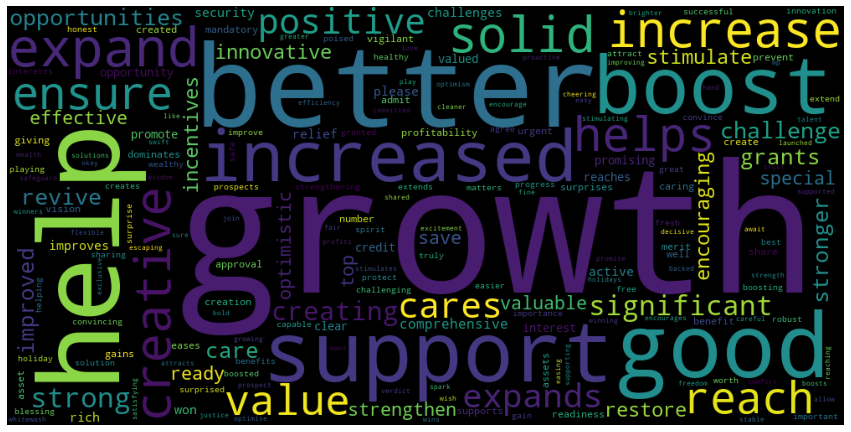

In [6]:
#import wordcloud library and counter 
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

#in the comment below is for displaying wordcloud that specific to year. Can also be done with specific month, year or both
#example2020=positiveword[positiveword['Year']==2020]
#word_cloud_dict=Counter(example2020['String'])

#this is for displaying positve word wordcloud based on all years
word_cloud_dict=Counter(positiveword['String'])

#set the wordcloud parameters and generate
wordcloud=WordCloud(width=1000,height=500).generate_from_frequencies(word_cloud_dict)

#set the plt size and display it
plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



EX: Based on the positive wordcloud above, it can be seen that the word growth has the highest frequency on all of the news title since it is the largest font size in the image. When searching with specific date the wordcloud will display what is the behaviour of GDP on that specific date such as GDP growth, expanding or boost.

### ii) Negative Wordcloud 

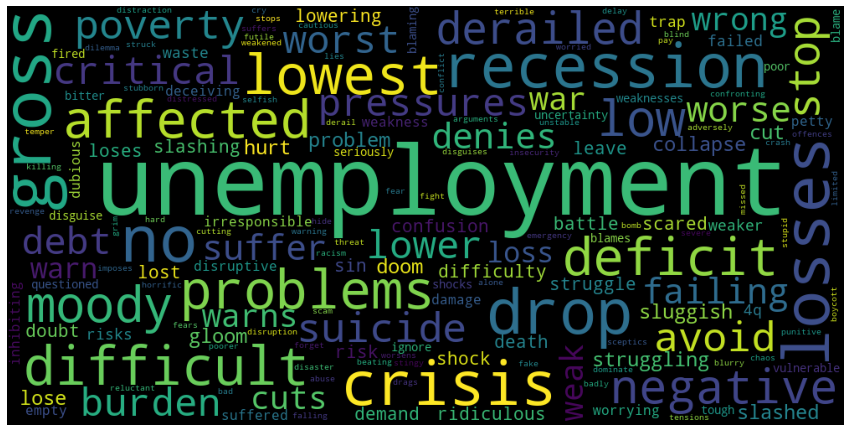

In [7]:
#in the comment below is for displaying wordcloud that specific to year. Can also be done with specific month, year or both
#example2021=negativeword[negativeword['Year']==2021]
#word_cloud_dict=Counter(example2021['String'])

#this is for displaying negative word wordcloud based on all years
word_cloud_dict=Counter(negativeword['String'])
#set the wordcloud parameter and generate
wordcloud=WordCloud(width=1000,height=500).generate_from_frequencies(word_cloud_dict)

#set the plt size and display it
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

EX: Based on the negative wordcloud above, it can be seen that unemployment has the highest frequency on all of the news with title of GDP. This means the unemployment rate for instance has the most mention on GDP search.

## 7) Percentage of sentiment detected using VADER & Spark NLP model

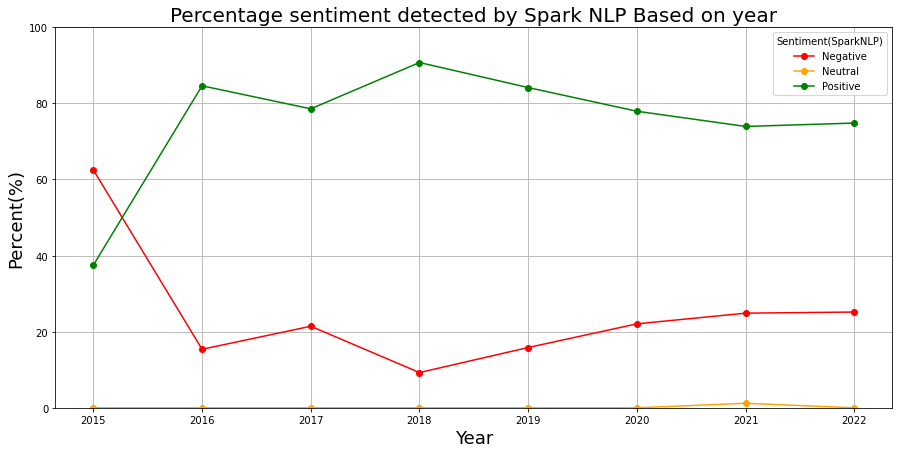

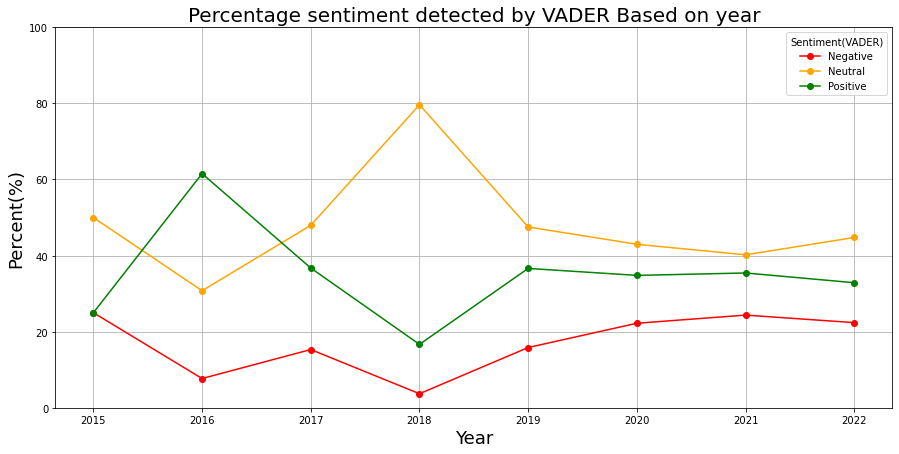

In [8]:
#count all on each Spark NLP 2015-2022 sentiment result and get total for each year
spark_result = dataall.groupby(['Sentiment(SparkNLP)','Year']).count()

#count all on each VADER 2015-2022 sentiment result and get total for each year
vader_result = dataall.groupby(['Sentiment(VADER)','Year']).count()

#for index labelling
spark_result = spark_result.unstack()
vader_result = vader_result.unstack()

#select column to count 
spark_result = spark_result.xs('Score(SparkNLP)', axis="columns").transpose()
vader_result = vader_result.xs('Vader_Score', axis="columns").transpose()

#filling the empty result with 0
spark_result['Neutral'] = spark_result['Neutral'].fillna(0)
vader_result['Neutral'] = vader_result['Neutral'].fillna(0)

#create list of year 
yeardata=[2015,2016,2017,2018,2019,2020,2021,2022]

#iterate based on list of year
for i in yeardata:
    
    #assign the year data into variable
    year=i
    
    #assign the total spark negative result on that year into variable
    sparktotalnegative=spark_result.loc[year,"Negative"]
    
    #assign the total spark positive result on that year into variable
    sparktotalpositive=spark_result.loc[year,"Positive"]
    
    #assign the total spark neutral result on that year into variable
    sparktotalneutral=spark_result.loc[year,"Neutral"]
    
    #get total by adding all spark positive,neutral and negative result
    sparktotalresult=sparktotalnegative+sparktotalpositive+sparktotalneutral
    
    
    #assign the total VADER negative result on that year into variable
    vadertotalnegative=vader_result.loc[year,"Negative"]
    
    #assign the total VADER positive result on that year into variable
    vadertotalpositive=vader_result.loc[year,"Positive"]
    
    #assign the total VADER neutral result on that year into variable
    vadertotalneutral=vader_result.loc[year,"Neutral"]
    
    #get total by adding all VADER positive,neutral and negative result
    vadertotalresult=vadertotalnegative+vadertotalpositive+vadertotalneutral
    
    
    #calculate the percentage for every sentiment result and round to 2 decimal places
    #ex: (total specific sentiment result/total all sentiment result) x 100
    sparkpercentnegative=round((sparktotalnegative/sparktotalresult)*100,2)#percentage for Spark negative sentiment
    sparkpercentpositive=round((sparktotalpositive/sparktotalresult)*100,2)#percentage for Spark positive sentiment
    sparkpercentneutral=round((sparktotalneutral/sparktotalresult)*100,2)#percentage for Spark neutral sentiment
    
    vaderpercentnegative=round((vadertotalnegative/vadertotalresult)*100,2)#percentage for VADER negative sentiment
    vaderpercentpositive=round((vadertotalpositive/vadertotalresult)*100,2)#percentage for VADER positive sentiment
    vaderpercentneutral=round((vadertotalneutral/vadertotalresult)*100,2)#percentage for VADER neutral sentiment
    
    #assign the percentage into respective column
    spark_result.loc[year,"Negative"]=sparkpercentnegative
    spark_result.loc[year,"Neutral"]=sparkpercentneutral
    spark_result.loc[year,"Positive"]=sparkpercentpositive
    
    vader_result.loc[year,"Negative"]=vaderpercentnegative
    vader_result.loc[year,"Neutral"]=vaderpercentneutral
    vader_result.loc[year,"Positive"]=vaderpercentpositive


#1st graph
#set the size of the figure
plt.rcParams['figure.figsize'] = [15, 7]
#set the colour for bar graph
colours=['red','orange','green']

#plotting the graph
spark_result.plot(kind = 'line',color=colours,marker='o')

#set the grpah grid
plt.grid()
#set the title of the graph
plt.title('Percentage sentiment detected by Spark NLP Based on year',fontsize=20)

#set the range of data(start with, end with)
plt.ylim(0, 100)
#labeling x and y axis
plt.ylabel("Percent(%)",fontsize=18)
plt.xlabel("Year",fontsize=18)

plt.show()


#2nd graph
vader_result.plot(kind = 'line',color=colours,marker='o')

#set the grpah grid
plt.grid()
#set the title of the graph
plt.title('Percentage sentiment detected by VADER Based on year',fontsize=20)

#set the range of data(start with, end with)
plt.ylim(0, 100)
#labeling x and y axis
plt.ylabel("Percent(%)",fontsize=18)
plt.xlabel("Year",fontsize=18)

plt.show()


Based on the first graph it shows that Spark NLP didn't detecting any neutral sentiment from year 2015 to 2020. While VADER detecting the highest neutral sentiment percent on 2018 shown on the second graph. Both of this graph shows the percent of sentiment based on the year.

## 8) Count Sentiment detected by using VADER & Spark NLP model

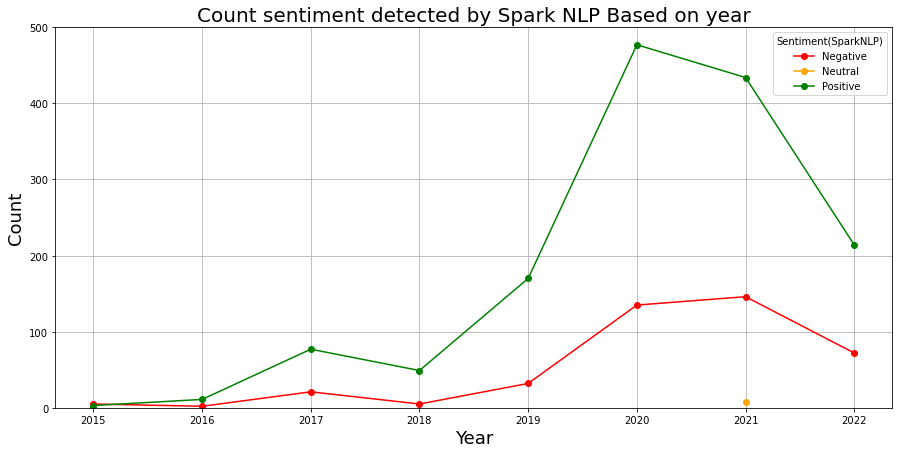

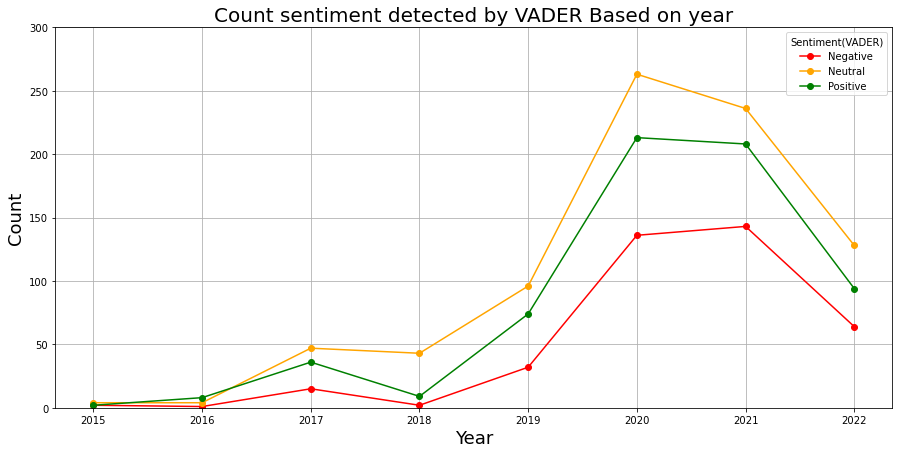

In [10]:
#1st plot graph
#set the figgure size
plt.rcParams['figure.figsize'] = [15, 7]

#grouping the data for Spark NLP sentiment result by year and count
count_spark = dataall.groupby(['Sentiment(SparkNLP)','Year']).count()

count_spark = count_spark.unstack()

#select column to count
count_spark = count_spark.xs('Score(SparkNLP)', axis="columns").transpose()
#defining the colours to be used for line graph
colours=['red','orange','green']
#plot the graph
count_spark.plot(kind = 'line',color=colours,marker='o')
#set the grid of graph
plt.grid()
#set the title of graph
plt.title('Count sentiment detected by Spark NLP Based on year',fontsize=20)
#set the limit range of the graph
plt.ylim(0, 500)
#set the x and y label of the graph
plt.xlabel("Year",fontsize=18)
plt.ylabel("Count",fontsize=18)

plt.show()


#2nd plot graph

#set the figgure size
plt.rcParams['figure.figsize'] = [15, 7]

#grouping the data for VADER sentiment result by year and count
count_vader = dataall.groupby(['Sentiment(VADER)','Year']).count()

count_vader = count_vader.unstack()

#select column to count
count_vader = count_vader.xs('Vader_Score', axis="columns").transpose()
#defining the colours to be used for line graph
colours=['red','orange','green']
#plot the graph
count_vader.plot(kind = 'line',color=colours, marker='o')

#set the grid of graph
plt.grid()
#set the title of graph
plt.title('Count sentiment detected by VADER Based on year',fontsize=20)
#set the limit range of the graph
plt.ylim(0, 300)
#set the x and y label of the graph
plt.xlabel("Year",fontsize=18)
plt.ylabel("Count",fontsize=18)

plt.show()




## 9) Average Sentiment score detected by VADER & SparkNLP based on year

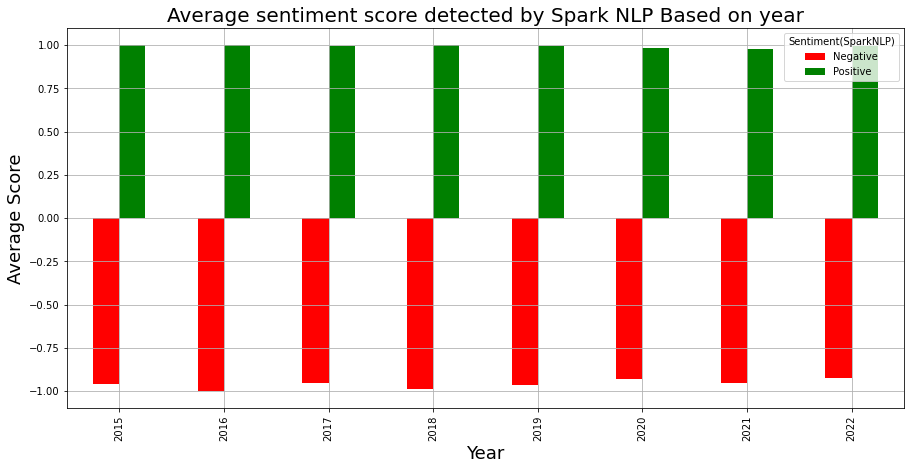

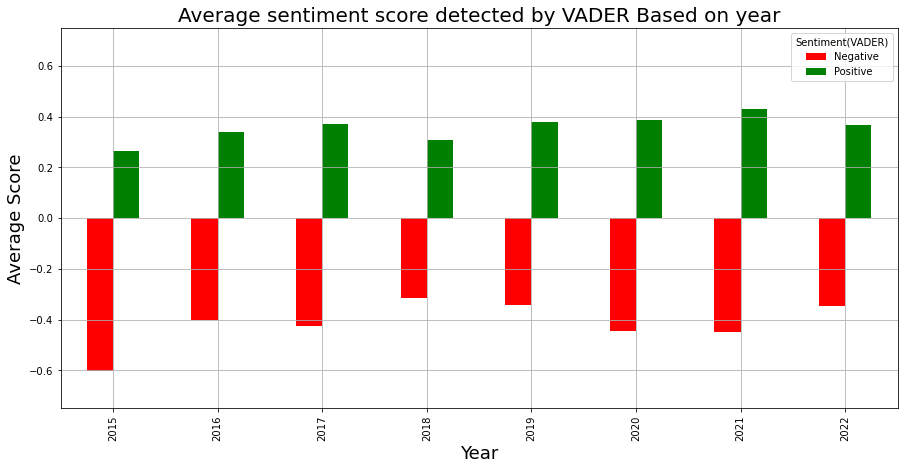

In [11]:
#1st Graph
dataspark=dataall[dataall['Sentiment(SparkNLP)']!="Neutral"]
#set the figure size
plt.rcParams['figure.figsize'] = [15, 7]
#grouping the spark sentiment result by year and calculate its average
avg_spark = dataspark.groupby(['Sentiment(SparkNLP)','Year']).mean()

avg_spark = avg_spark.unstack()
#select the column 
avg_spark = avg_spark.xs('Score(SparkNLP)', axis="columns").transpose()
#set the colours
colours=['red','green']
#plot the graph
avg_spark.plot(kind = 'bar',color=colours)

plt.grid()

plt.title('Average sentiment score detected by Spark NLP Based on year',fontsize=20)

plt.ylim(-1.1, 1.1)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Average Score",fontsize=18)
plt.show()

#2nd Graph
datavader=dataall[dataall['Sentiment(VADER)']!="Neutral"]

#set the figure size
plt.rcParams['figure.figsize'] = [15, 7]
#grouping the spark sentiment result by year and calculate its average
avg_vader = datavader.groupby(['Sentiment(VADER)','Year']).mean()

avg_vader = avg_vader.unstack()
#select the column 
avg_vader = avg_vader.xs('Vader_Score', axis="columns").transpose()
#set the colours
colours=['red','green']
#plot the graph
avg_vader.plot(kind = 'bar',color=colours)

plt.grid()

plt.title('Average sentiment score detected by VADER Based on year',fontsize=20)

plt.ylim(-0.75, 0.75)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Average Score",fontsize=18)
plt.show()

## 10) Average sentiment score detected using Spark & VADER on 2022

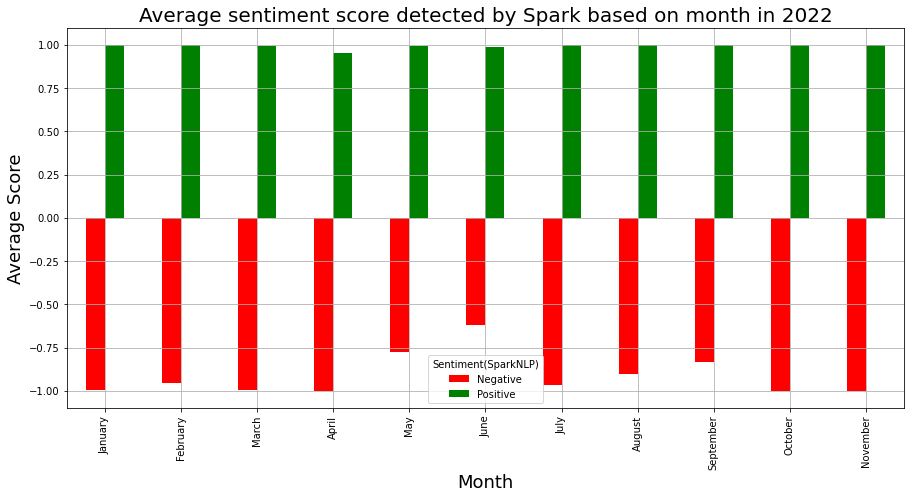

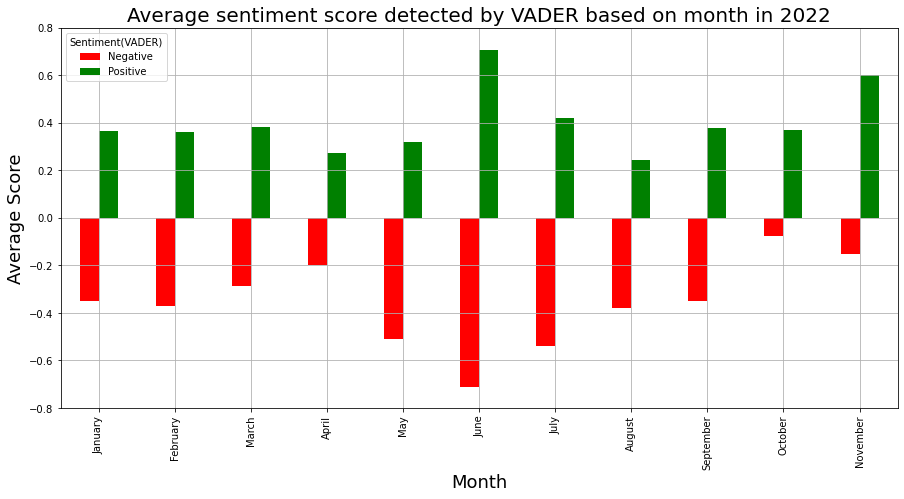

In [12]:
#set the data to specific year
data2022=dataall[dataall["Year"]==2022]
#set the figure size
plt.rcParams['figure.figsize'] = [15, 7]

#grouping SparkNLP sentiment result by month of 2022 and calculate the average
month_spark = data2022.groupby(['Sentiment(SparkNLP)','Month']).mean()
month_spark = month_spark.unstack()

month_spark = month_spark.xs('Score(SparkNLP)', axis="columns").transpose()
month_spark = month_spark.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

#set the colours
colours=['red','green']

month_spark.plot(kind = 'bar',color=colours)

plt.grid()
plt.title('Average sentiment score detected by Spark based on month in 2022',fontsize=20)

plt.ylim(-1.1, 1.1)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Average Score",fontsize=18)
plt.show()


data2022=data2022[data2022['Sentiment(VADER)']!="Neutral"]
#set the figure size
plt.rcParams['figure.figsize'] = [15, 7]

#grouping SparkNLP sentiment result by month of 2022 and calculate the average
month_vader = data2022.groupby(['Sentiment(VADER)','Month']).mean()
month_vader = month_vader.unstack()

month_vader = month_vader.xs('Vader_Score', axis="columns").transpose()
month_vader = month_vader.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

#set the colours
colours=['red','green']

month_vader.plot(kind = 'bar',color=colours)

plt.grid()
plt.title('Average sentiment score detected by VADER based on month in 2022',fontsize=20)

plt.ylim(-0.8, 0.8)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Average Score",fontsize=18)
plt.show()


## 11) Count sentiment detected using Spark NLP & VADER

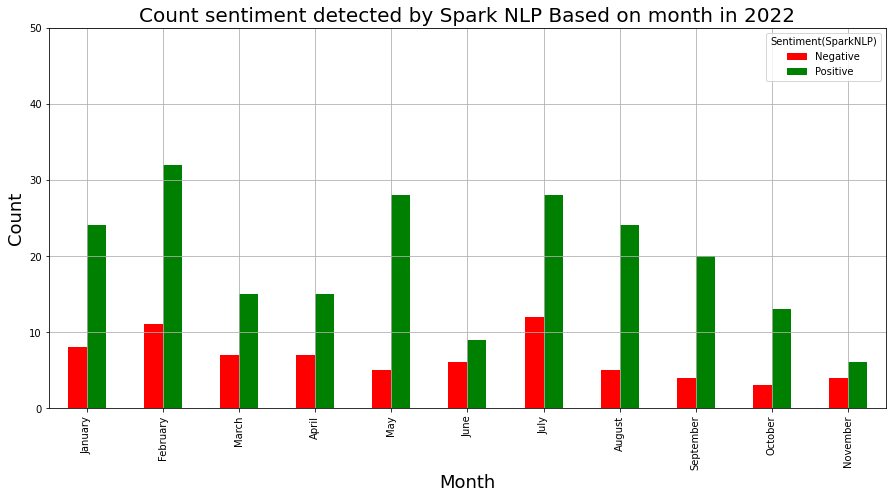

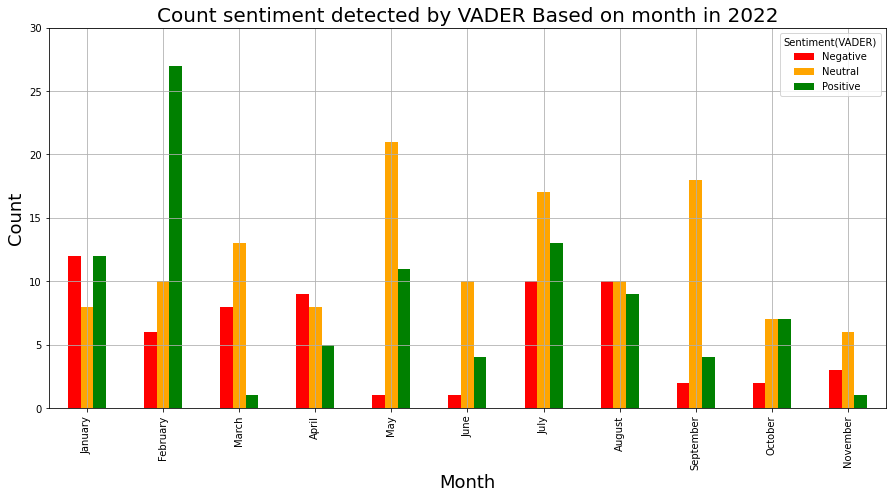

In [14]:
#first graph

#set the figure size
plt.rcParams['figure.figsize'] = [15, 7]
#assign the 2022 data into another dataframe 
data2022=dataall[dataall["Year"]==2022]
#grouping the spark nlp sentiment result based month on 2022
spark_2022 = data2022.groupby(['Sentiment(SparkNLP)','Month']).count()

spark_2022 = spark_2022.unstack()
#select the column to be used for counting
spark_2022 = spark_2022.xs('Score(SparkNLP)', axis="columns").transpose()
#process of sorting the month in monthly order
spark_2022 = spark_2022.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
#set the colour for bar graph
colours=['red','green']
#plot the bar graph
spark_2022.plot(kind = 'bar',color=colours)

plt.grid()
plt.title('Count sentiment detected by Spark NLP Based on month in 2022',fontsize=20)

plt.ylim(0, 50)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18,)

plt.show()



#2nd graph

#set the figure
plt.rcParams['figure.figsize'] = [15, 7]
#grouping the VADER sentiment result based month on 2022
vader_2022 = data2022.groupby(['Sentiment(VADER)','Month']).count()

vader_2022 = vader_2022.unstack()
#select the column to be used for counting
vader_2022 = vader_2022.xs('Vader_Score', axis="columns").transpose()
#process of sorting the month in monthly order
vader_2022 = vader_2022.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
#set the colour for bar graph
colours=['red','orange','green']
#plot the bar graph
vader_2022.plot(kind = 'bar',color=colours)

plt.grid()
plt.title('Count sentiment detected by VADER Based on month in 2022',fontsize=20)

plt.ylim(0, 30)
plt.xlabel("Month",fontsize=18)
plt.ylabel("Count",fontsize=18,)

plt.show()